In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def convolve_2D(M,k):
    M = np.array(M)
    Ny, Nx = M.shape
    Nk, Nk = k.shape  # hopefully this is odd and square
    dk = Nk//2
    result = np.zeros(M.shape)
    for j in range(dk,Ny-dk):
        for i in range(dk,Nx-dk):
            for jk in range(Nk):
                for ik in range(Nk):
                    result[j,i] += M[j-dk+jk, i-dk+ik]*k[jk,ik]   
    return result
                    
def show_kernel(ax, kernel):
    '''for nice kernel plotting with number labels'''
    knorm = kernel - np.min(kernel)
    if np.std(knorm)>0:
        knorm = knorm / np.max(knorm)
    Nk, Nk = knorm.shape
    ax.imshow(knorm, cmap='gray', vmin=-1,vmax=1,extent=(0,Nk,0,Nk))
    ax.set_xticks(range(Nk+1))
    ax.set_yticks(range(Nk+1))
    ax.grid(which='both',color='k')
    
    # label vals
    fsz = 12*3/Nk
    for i in range(Nk):
        for j in range(Nk):
            ax.text(i+0.5,j+0.5,kernel[j,i],fontsize=fsz,  ha='center', va='center')
            


# Read in the original image

(339, 508)


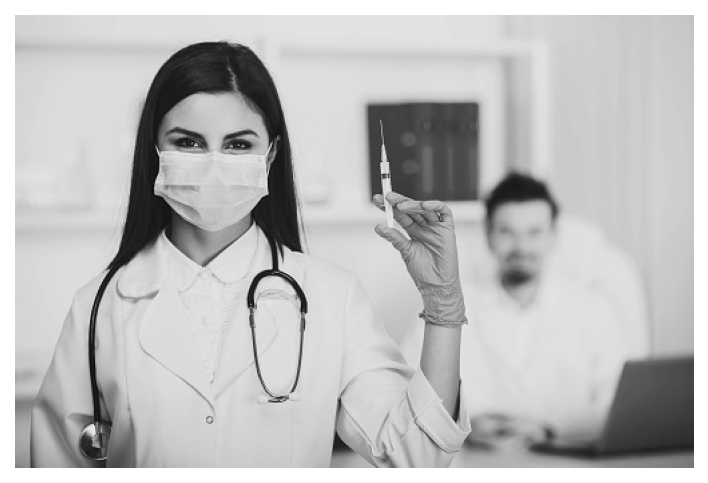

In [3]:
filename = 'imgs/stock1.jpg' 
img = Image.open(filename)
data_rgb = np.asarray( img, dtype="int32" )
data = np.mean(data_rgb, axis=2)
if max(data.shape)>600:  # if big, downsample to save run time
    data = data[::2,::2]

fig,ax=plt.subplots(dpi=150)
ax.imshow(data, cmap='gray')
ax.axis('off')
print(data.shape)
plt.show()

# Test out some filters (kernels)

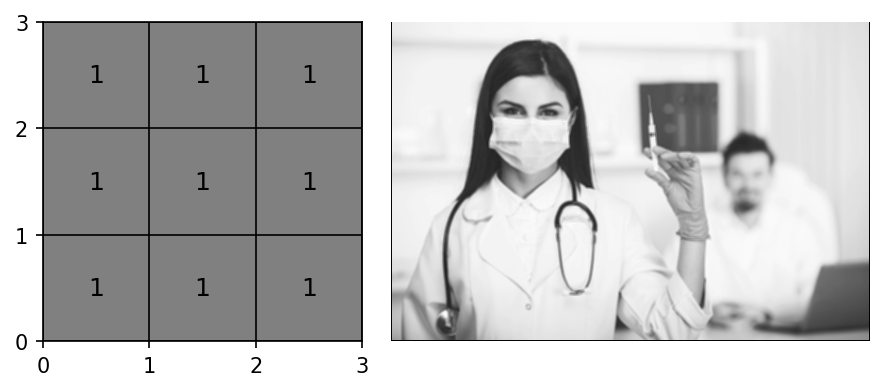

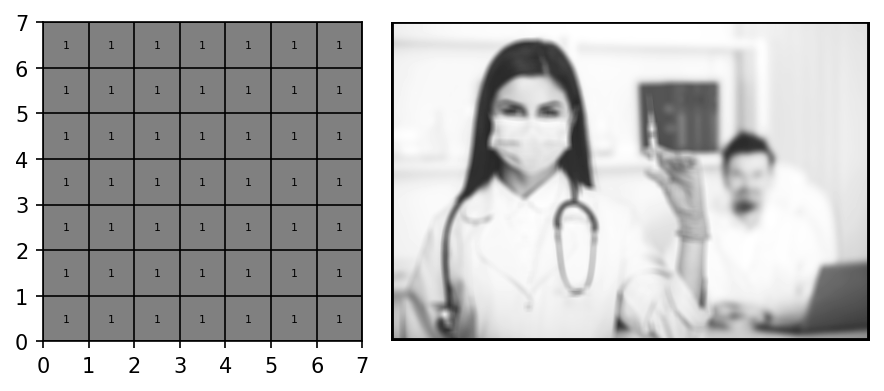

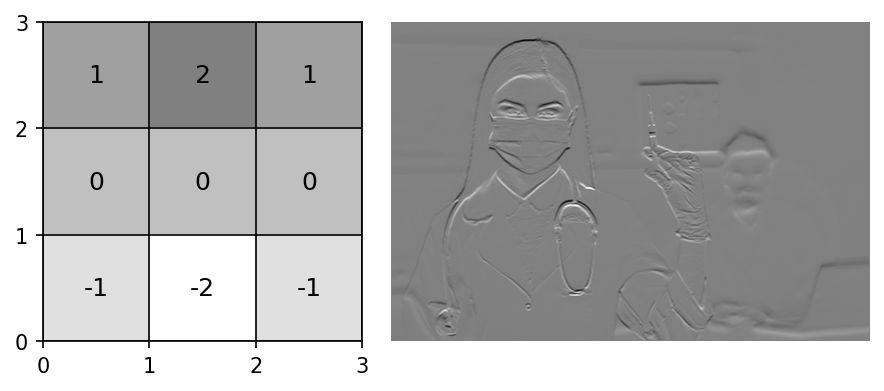

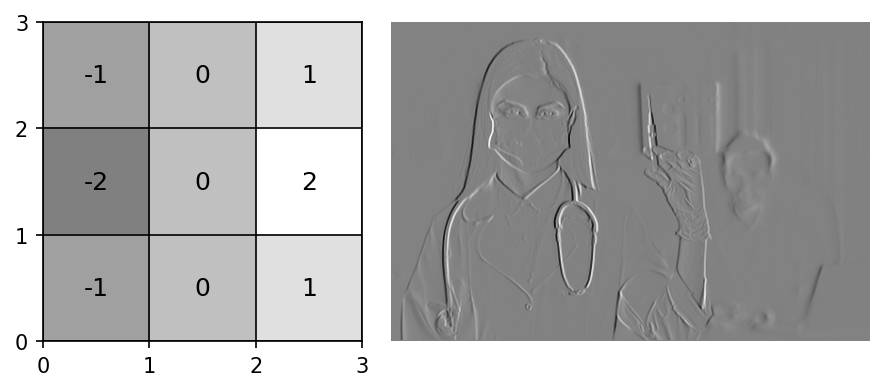

In [4]:
test = data 

# some kernels
k0 = np.ones([3,3],dtype=int)
k1 = np.ones([7,7],dtype=int)
sobel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_v = sobel_h.T

kernels = [k0, k1, sobel_h, sobel_v]
for kernel in kernels:
    out = convolve_2D(test, kernel)
    fig,ax=plt.subplots(1,2,dpi=150, gridspec_kw={'width_ratios':[1, data.shape[1]/data.shape[0]]})
    show_kernel(ax[0], kernel)
    ax[1].imshow(out,  cmap='gray')
    ax[1].axis('off')
    fig.tight_layout()
    plt.show()

# Edge detection task: apply Sobel filters

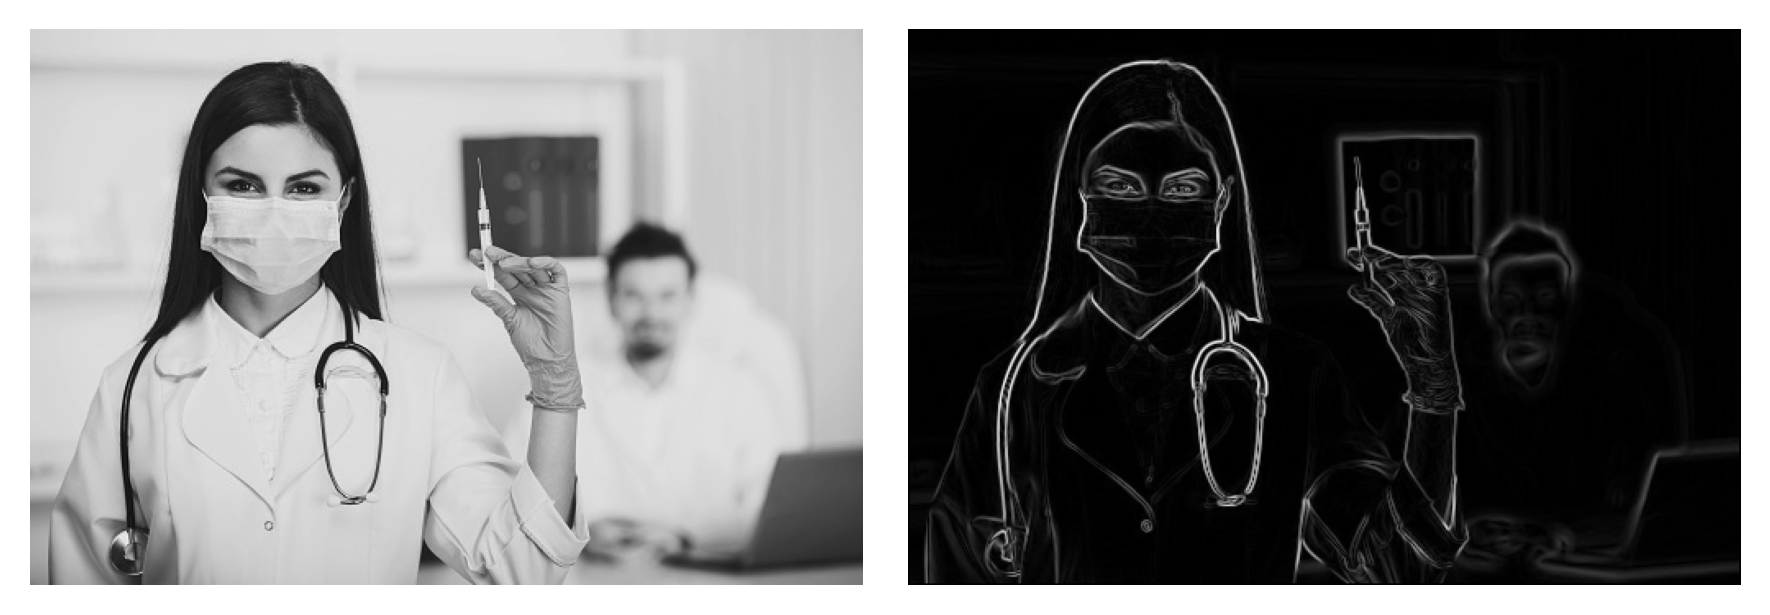

In [5]:
# Sobel edge detection
edge_h = convolve_2D(test, sobel_h)
edge_v = convolve_2D(test, sobel_v)
edge_mag = np.sqrt(edge_h**2 + edge_v**2)

fig,ax=plt.subplots(1,2,dpi=300)
ax[0].imshow(test, cmap='gray')
ax[1].imshow(edge_mag,  cmap='gray')
for axi in ax:
    axi.axis('off')
fig.tight_layout()
plt.show()

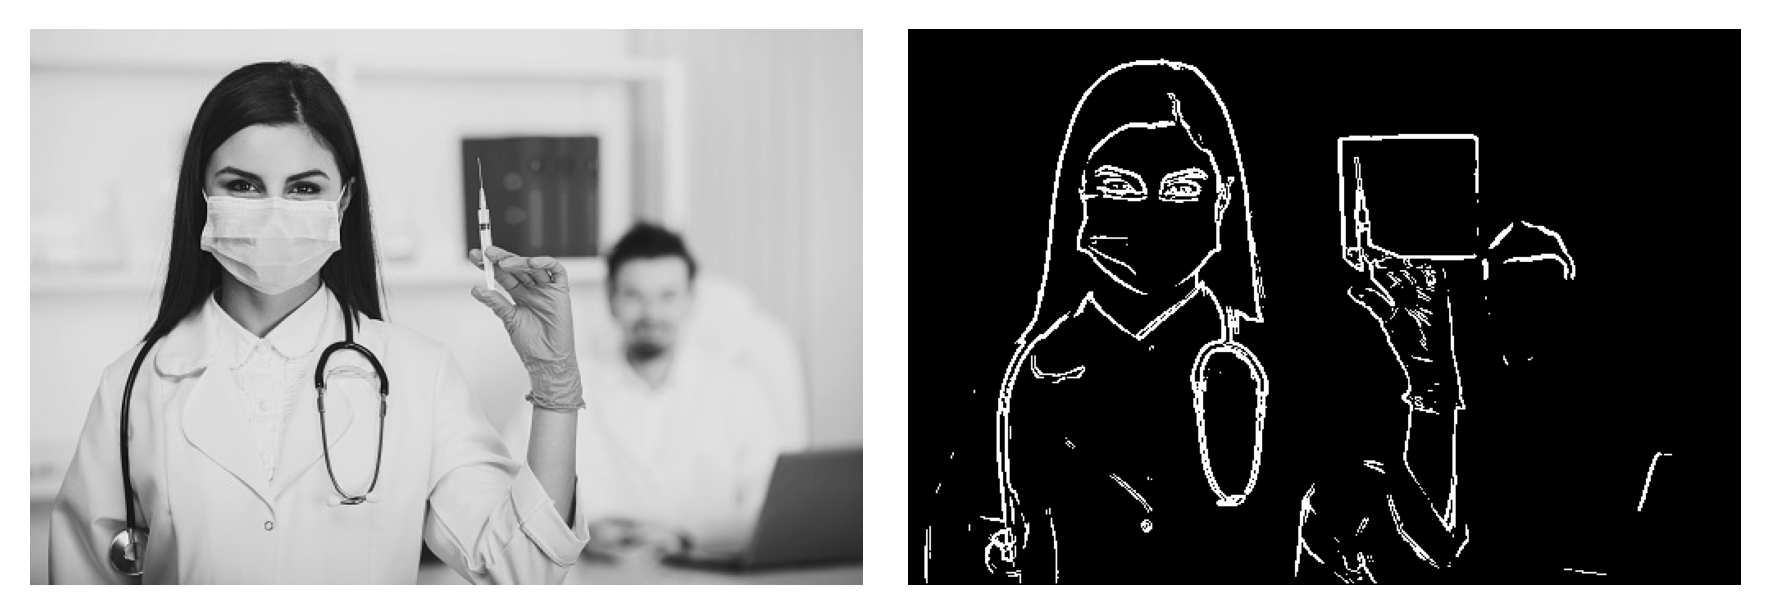

In [6]:
# # add some thresholding
t=0.2
edge_mag = edge_mag/np.max(edge_mag)
edge_mag[edge_mag<t] = 0
edge_mag[edge_mag>t] = 1

fig,ax=plt.subplots(1,2,dpi=300)
ax[0].imshow(test, cmap='gray')
ax[1].imshow(edge_mag,  cmap='gray')
for axi in ax:
    axi.axis('off')
fig.tight_layout()
plt.show()